### Bias & Fairness in Data: Distribution Check
**Description**: Load the Adult Income dataset and check for representation bias by analyzing the distribution of gender across different income levels.

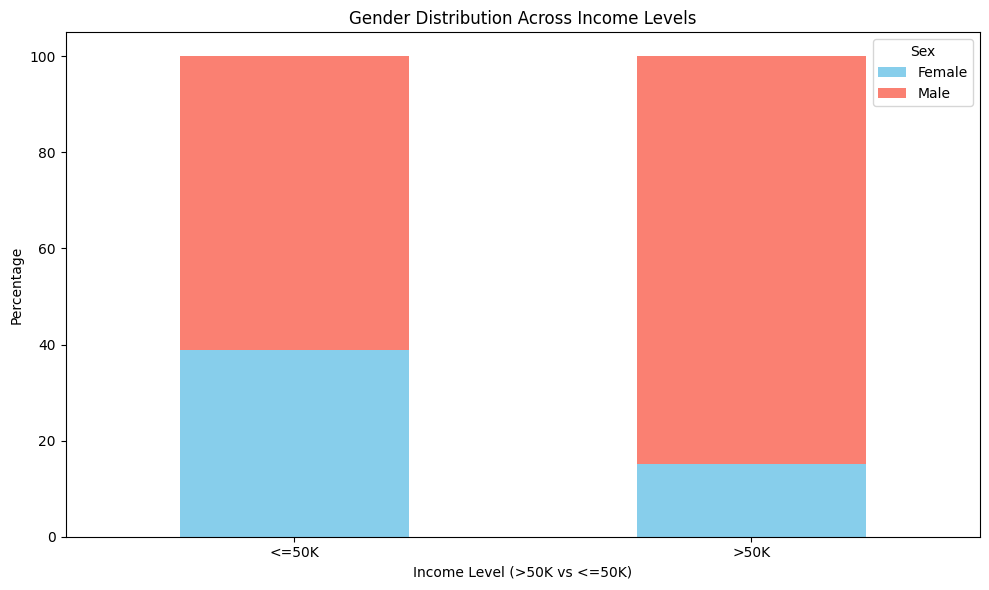

In [1]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/adult-all.csv"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=columns)

# Convert 'income' to binary
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Group by 'income_binary' and 'sex', and count occurrences
gender_income_dist = df.groupby(['income_binary', 'sex']).size().unstack(fill_value=0)

# Calculate percentages
gender_income_percent = gender_income_dist.div(gender_income_dist.sum(axis=1), axis=0) * 100

# Plot the distribution
gender_income_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Gender Distribution Across Income Levels')
plt.xlabel('Income Level (>50K vs <=50K)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()
